<a href="https://colab.research.google.com/github/936-BCruz/Python-for-STEM-Teachers-Workshop/blob/master/notebooks/11-ML_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np                
import matplotlib.pyplot as plt   # for plotting
import pandas as pd               # to manage the data

The dataset we are going to use comes from the University of Winsconsin, where they describe characteristics of the cell nuclei from a breast mass. We would like to identify if the cell suggest breast cancer development or not. Let's download it and take a look of its content...
[https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)]

In [ ]:
path = 'https://raw.githubusercontent.com/GuillermoFidalgo/Python-for-STEM-Teachers-Workshop/master/data/wdbc.data'

# creating the dataframe
df = pd.read_csv(path,header=None) 

# dataframe print
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


We can see some values but have no idea of what these columns represent. From the link of where we downloaded the data, we can see the first two columns are the ID number and the Diagnosis of the cells. The rest of the columns are *radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension*. And, these attributes are repeated for 3 cell nuclei 

In [ ]:
# attributes of interest from the dataframe
att=["radius","texture","perimeter",
              "area","smoothness","compactness","concavity",
              "concave points","symmetry","fractal dimension"]
# (knowing the data has 3 of the same attributes) getting the 2 and 3 of each attribute of interest
att2 = [i+"2" for i in att]
att3 = [i+'3' for i in att]

# combining the ID number and Diagnosis along the attributes? 
df.columns = np.concatenate([['ID number','Diagnosis'],att,att2,att3])

#printing the dataframe again
df

,ID number,Diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave points3,symmetry3,fractal dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# information about the dataframe: entries, types,
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID number           569 non-null    int64  
 1   Diagnosis           569 non-null    object 
 2   radius              569 non-null    float64
 3   texture             569 non-null    float64
 4   perimeter           569 non-null    float64
 5   area                569 non-null    float64
 6   smoothness          569 non-null    float64
 7   compactness         569 non-null    float64
 8   concavity           569 non-null    float64
 9   concave points      569 non-null    float64
 10  symmetry            569 non-null    float64
 11  fractal dimension   569 non-null    float64
 12  radius2             569 non-null    float64
 13  texture2            569 non-null    float64
 14  perimeter2          569 non-null    float64
 15  area2               569 non-null    float64
 16  smoothne

We basically don't need the ID number, so we'll eliminate it from the dataframe and keep what we belief are the most relevant attributes.

In [ ]:
# drop the ID number columns 
df = df.drop(columns= "ID number")

# print the correlation matrix of the remaining columns attributes
df.iloc[:,:11].corr()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal dimension
radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


Corrleation will tell us how the data relate to each other. Another way to look at these relationships is by plotting the correlation matrix

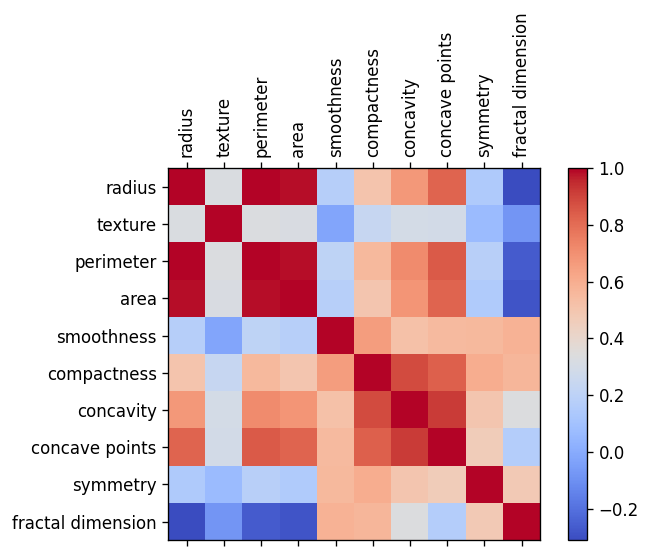

In [ ]:
plt.figure(dpi=120)
# making a plot from the previous correlation matrix
plt.matshow(df.iloc[:,:11].corr(),fignum=1,cmap='coolwarm')
plt.xticks(ticks=range(len(att)), labels=att, rotation=90)     # attributes on the x-ticks
plt.yticks(ticks=range(len(att)), labels=att)                  # attributes on the y-ticks
plt.colorbar()   # add a color bar on the side of the main plot 
plt.show()

The "hotter" (red) an element is, the more correlated it is to that attribute. Blue tells us that there's little to no correlation, where a negative value tells us it's anti-correlated. This analysis allows us to chose which attributes are best to study. For example, we can see how the radius is very correlated to the perimeter and area. 

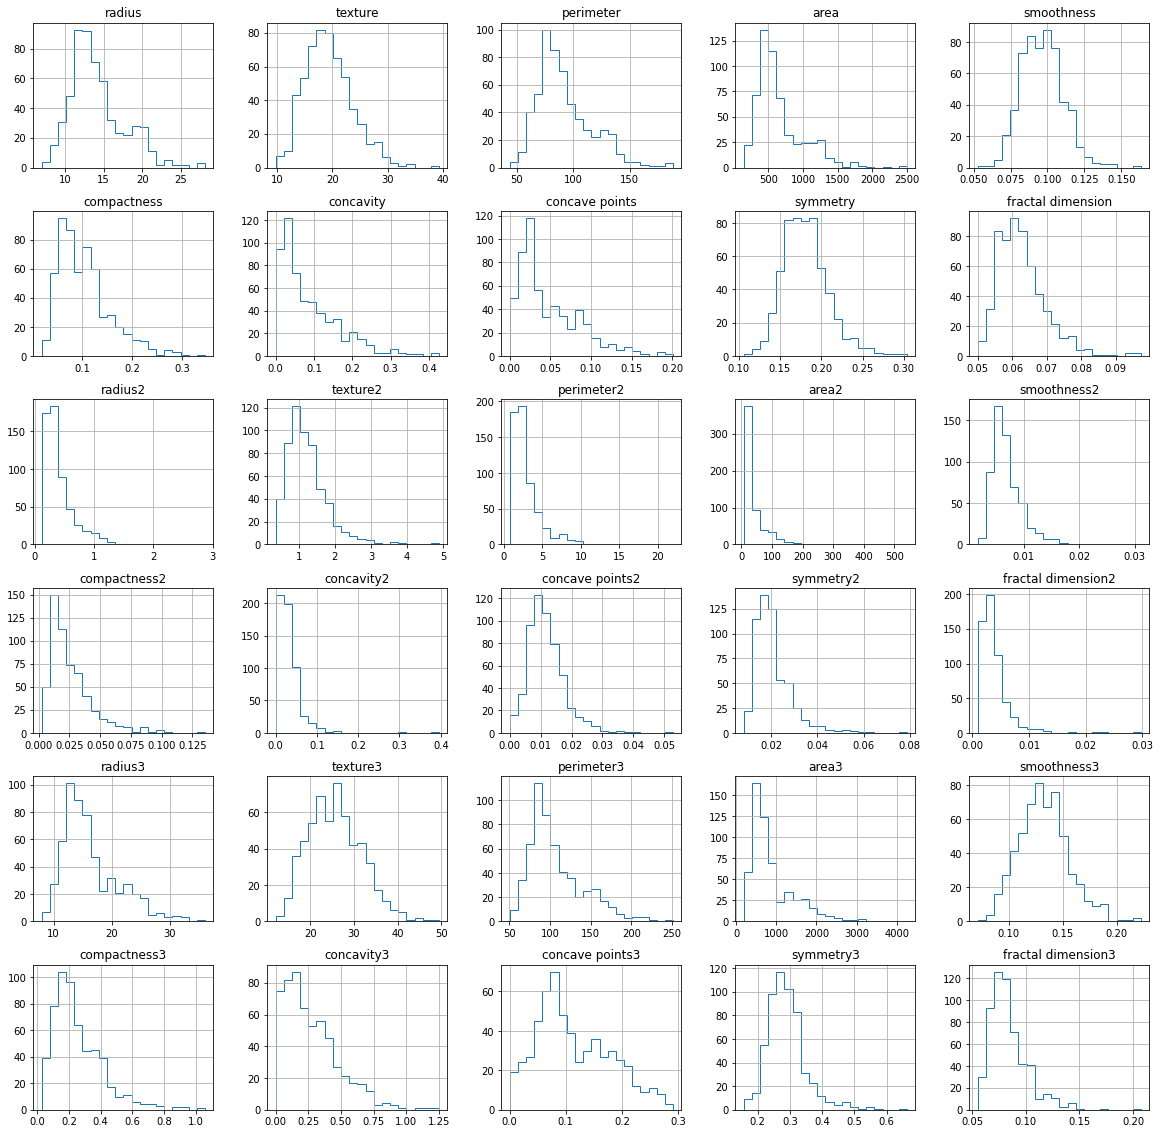

In [ ]:
# making a histogram all the attributes data (without ID number)
df.hist(figsize=(20,20),bins=20,histtype='step')
plt.show()

## Machine Learning model setup...

In [ ]:
# useful libraries for machine learning

from sklearn.preprocessing import StandardScaler,normalize             # to change raw feature vectors into a representation more suitable for "downstream estimators" 
from sklearn.model_selection import cross_val_score,train_test_split   # to select a model to analyze data and use it to measure new data


In [ ]:
X = df.iloc[:,1:]   # assign all the columns except ID number as the X data
scaler = StandardScaler()                          # Standardize features by removing the mean and scaling to unit variance.
X = np.asarray(X).astype('float32')                # re-assign X as an array of it
X = scaler.fit_transform(X)                        # fit X and apply scalar transformation


y = df.Diagnosis  
y [y == "M"] = 1.0   # malignant
y[y =='B'] = 0.0     # benign 
## The previous two commands are re-writting any M as 1.0, and B as 0.0
## this will allow us to classify the data more easily, compared if we had to so with strings
y = np.asarray(y).astype('float32')     # make an array of the y df.Diagnosis


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0.

## Machine Learning Model Training

In [ ]:
## If you want to get a consistent result from the training, we need to specify a random seed
## Comment all of this out or don't run this block to get different results from the following training

# Set a seed value
seed_value= 12321 
# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)


In [ ]:
# randomly split X and y into a "train" and "test" arrays
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y)

In [ ]:
# useful libraries for deep learning model 
import keras
from keras.activations import relu                     # activation function
from keras.models import Sequential,save_model,Model   # model utilities
from keras.layers import Dense,Flatten,Input           # utilities for neural networks
from keras.utils.vis_utils import plot_model           # to plot Keras models

### Chosing the Machine Learning model... 

Here we are using the Keras' Sequential model, which is useful for a plain stack of layers with a single input tensor; here we also have an example of a neural network. Each layer is also known as a "neuron", and the connection of all of them in the model is known as the neural network. 

![](https://www.researchgate.net/profile/Rahul-Jayawardana/publication/350567223/figure/fig2/AS:1007855343792135@1617302847605/Fig-2-A-sequential-neural-model-Keras-Sequential-Api-nd-Activation-Functions-The.jpg) 

Each layer uses an activation function on the input to then output the data in a predictable form. Two activation functions we are using are 'relu' and 'sigmoid'. The Rectified Linear Unit (ReLU) is a linear function that directly outputs the input if it is positive; otherwise, it outputs zero. 

An example of a non-linear activation function is the sigmoid activation function. These have the befinit of learning more complex structures from data. This activation function transforms the input into a number between 0.0 and 1.0. 

In [ ]:
model = Sequential([                       # using the Sequential model
    Input(shape=Xtrain.shape[1]),          # Instantiate a Keras tensor with the shape of the second element of Xtrain
    Dense(32,activation= 'relu'),          # start the NN with 32 layers, and a relu activation function
    Dense(10,activation='relu'),           # continue the NN with 10 layers ...
    Dense(1,activation='sigmoid')]         # end the NN with one layer and a sigmoid activation function
    )
model.compile(optimizer='adam', loss='mse',metrics="accuracy")  # configures the model for training

An oprimizer adpats the model's algorithm to produce the results. Unlike the stohastic gradient descent, the Adam optimizer updates the learning rate of a layer's parameter (weights) based on the data.  

The loss function quantifies how "good" the network is in order for the model to do better. The mean-square-error (MSE) calculates the average of the squared-error of the data. In our case, it calculates the error of the predicted value (y_pred) produced from the model, from the true value (y_true) the output should have. 

The metric is what is used to judge the performance of the model. In this case, we use the accuracy of how y_pred matches y_true.

Here is a visual example of what an optimizer does...

![](https://camo.githubusercontent.com/cccdc200cc2a3052ad9562f6f58ebd429d634fb1190a84b20db931e8ad4ffb8f/68747470733a2f2f692e737461636b2e696d6775722e636f6d2f316f6274562e676966)

It will basically look for the minimum 

![](https://mpopov.com/images/adam-animated.gif)

For a stohastic gradient descent (the simple version of the Adam optimizer), it also looks for the minimum, but you would need to specify the learning rate parameter in the layers. At first, you'll need to play around to find the right value. If you overshoot it, the optimizer goes back-and-forth on the minimum

![](https://keep.google.com/u/0/media/v2/1STEtOvV3QUc6ff8e0yo4xoWAWYBoptoO5162t2yIPUcnWDKm2hsizNgK3Lq5wg/1GOCjqTg0bQooM6K4xME9HiVmqAhu_J-yZACIk-uRZ8aSxlshtE_pyYgdlO8rch4?sz=512&accept=image%2Fgif%2Cimage%2Fjpeg%2Cimage%2Fjpg%2Cimage%2Fpng%2Cimage%2Fwebp)

Choosing a good value will produce a more smooth descent to the minimum

![](https://keep.google.com/u/0/media/v2/17bUodH55Yvq-Zk-PoWzsn4zVA_aEXKZqBZ-oV94vmRaXU9Y1vjLGCEpXzCgNLh4/179I1fzbIqMoaVO0BcdoRUc_WYUFIp1XrDeqwQ_GjwynJ3A-md2PWKy_IGmDRFg?accept=image%2Fgif%2Cimage%2Fjpeg%2Cimage%2Fjpg%2Cimage%2Fpng%2Cimage%2Fwebp%2Caudio%2Faac&sz=384) 


In [ ]:
# To see the amount of parameters each layer had to deal with
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,333
Trainable params: 1,333
Non-trainable params: 0
_________________________________________________________________


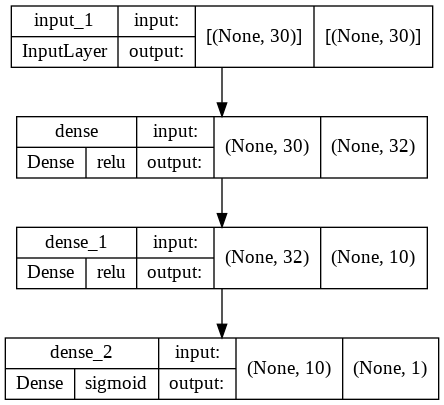

In [ ]:
plot_model(model,show_layer_activations=True,show_shapes=True,)

In [ ]:
# Model training 
history = model.fit(Xtrain,ytrain,           # input and target data
                    validation_split=0.2,    # uses a random 20% of the data before shuffling it for validation
                    epochs=50                # training iterations on the dataset
)

Epoch 1/50
11/11 [==============================] - 1s 37ms/step - loss: 0.2013 - accuracy: 0.6324 - val_loss: 0.1517 - val_accuracy: 0.7326
Epoch 2/50
11/11 [==============================] - 0s 4ms/step - loss: 0.1463 - accuracy: 0.8059 - val_loss: 0.1162 - val_accuracy: 0.8140
Epoch 3/50
11/11 [==============================] - 0s 6ms/step - loss: 0.1090 - accuracy: 0.8647 - val_loss: 0.0919 - val_accuracy: 0.9070
Epoch 4/50
11/11 [==============================] - 0s 6ms/step - loss: 0.0870 - accuracy: 0.8971 - val_loss: 0.0752 - val_accuracy: 0.9302
Epoch 5/50
11/11 [==============================] - 0s 6ms/step - loss: 0.0732 - accuracy: 0.9176 - val_loss: 0.0633 - val_accuracy: 0.9302
Epoch 6/50
11/11 [==============================] - 0s 4ms/step - loss: 0.0627 - accuracy: 0.9265 - val_loss: 0.0550 - val_accuracy: 0.9302
Epoch 7/50
11/11 [==============================] - 0s 5ms/step - loss: 0.0555 - accuracy: 0.9353 - val_loss: 0.0486 - val_accuracy: 0.9302
Epoch 8/50
11/11 [=

The aim is to minimize the loss function value, which is telling us that we are getting a good prediction from the model. 

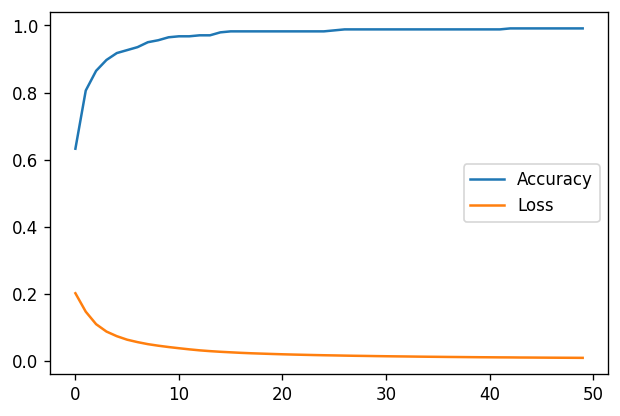

In [ ]:
# plot the accuracy measurement and loss function
plt.figure(dpi=120)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.legend()
plt.show()

In [ ]:
# evalutate the loss function and accuracy measurement of the test variables
model.evaluate(Xtest,ytest)

5/5 [==============================] - 0s 4ms/step - loss: 0.0264 - accuracy: 0.9650


[0.026420099660754204, 0.9650349617004395]

We notice how the _test_ values are 0.0264 and 0.9650, for the loss function and accuracy respectively. On the final epoch, our model's training outputs these values as 0.0086 and 0.9912.

In [ ]:
# generate the output prediction (probabilities) of the Xtest
ypred=model.predict(Xtest)
ypred.ravel()
## ravel puts all the values as a single list (ypred by itself is a list of lists of single elements)

array([9.3281269e-04, 1.9158125e-03, 6.3526630e-03, 2.2790432e-03,
       9.9999124e-01, 1.1456490e-02, 1.2549758e-04, 9.9343526e-01,
       9.9983913e-01, 4.8895776e-03, 3.9781630e-03, 9.9995357e-01,
       4.4798851e-04, 8.6156166e-01, 7.8331828e-03, 9.9966252e-01,
       1.9911051e-02, 1.0000000e+00, 9.9999636e-01, 1.0000000e+00,
       3.2120347e-03, 8.6438656e-04, 1.9367427e-02, 1.2194604e-02,
       2.4969280e-02, 5.7954490e-02, 5.8556795e-03, 6.6570938e-03,
       9.7533458e-01, 9.9997765e-01, 3.5307360e-01, 1.6535312e-02,
       8.5436374e-02, 9.0605521e-01, 9.9999672e-01, 1.1607909e-01,
       1.0072410e-02, 2.3419324e-01, 9.9935353e-01, 4.1606039e-02,
       5.6742460e-01, 3.7458837e-03, 9.9999893e-01, 6.1585903e-02,
       9.9999678e-01, 4.0626526e-04, 9.7325879e-01, 4.4532418e-03,
       3.7496507e-02, 1.7782074e-01, 2.1238625e-03, 7.4547231e-03,
       4.0825605e-03, 1.6642511e-03, 2.0830035e-03, 1.0000000e+00,
       3.3578575e-03, 4.4589937e-03, 2.8482080e-04, 9.3877316e

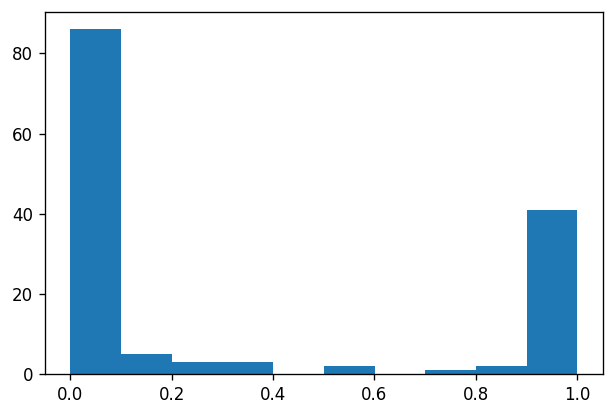

In [ ]:
# plot histogram of ypred
plt.figure(dpi=120)
plt.hist(ypred)
plt.show()

This histogram is telling us how the ypred values are distributed between 0.0 and 1.0, where most (over 80 entries) are 0.0 (remember: benign), and we have a second peak at 1.0 (malignant) with over 40 entries.

In [ ]:
# more utilities to study the model
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,roc_auc_score,roc_curve,RocCurveDisplay

## libraries to make the confusion matrix and plot it, and make the ROC curve and plot it

# Confusion Matrix

Confusion matrices are used to visualize and summarize the performance of a classification algorithm. Notice we have trying to classify wether the data is benign or malignant.

In [ ]:
# create the confusion matrix of ytest to evaluate the accuracy of classification
cm=confusion_matrix(ytest,np.round(ypred.ravel()))

## np.round rounds the values of ypred


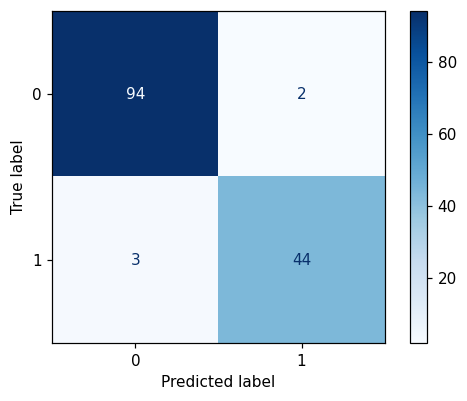

In [ ]:
# plot the confusion matrix
fig=plt.figure(dpi=110)
ax=plt.subplot(111)
ConfusionMatrixDisplay(cm).plot(ax=ax,cmap='Blues')
plt.show()

Here we see 94 benign entries that were classified correctly, while only 2 were incorrectly identified as malignant. On the other hand, 44 entries were classified correctly as malignant, while 3 were not.

# ROC curve

A Receive Operating Characteristic (ROC) curve illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. It plots the true positive rate vs the false positive rate.

The false posive rate is a calculation of when a class being predicted as positive, when it should have been false.
$$\rm False Positive Rate = \frac{False Positives}{(False Positives + True Negatives)}$$

where **TrueNegative** are the correctly classified *negative* data. 

True positive rate is the calculation of a positive class when that's the correct outcome. 
$$\rm True Positive Rate = \frac{True Positives}{(True Positives + False Negatives)}$$

where **FalseNegatives** are the incorrectly classified *positive* data.

In [ ]:
# Area Under the Curve
auc = roc_auc_score(ytest,ypred)

# False Positive Rate, True Positive Rate, Threshold
fpr,tpr,thresh = roc_curve(ytest,ypred)

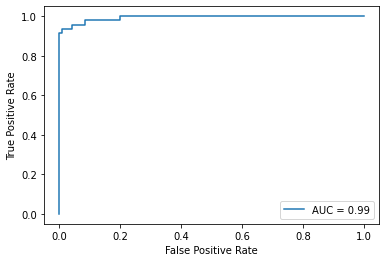

In [ ]:
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=auc).plot();

In [ ]:
auc

0.9929078014184398

The AUC is telling us that if we diagnose a patient, we would correctly diagnose it 99% of the time.  

This ROC curve tells us that we get 100% true positive classification if we allow a 20% false positive rate.  

Just re-plotting the ROC curve in a different style...

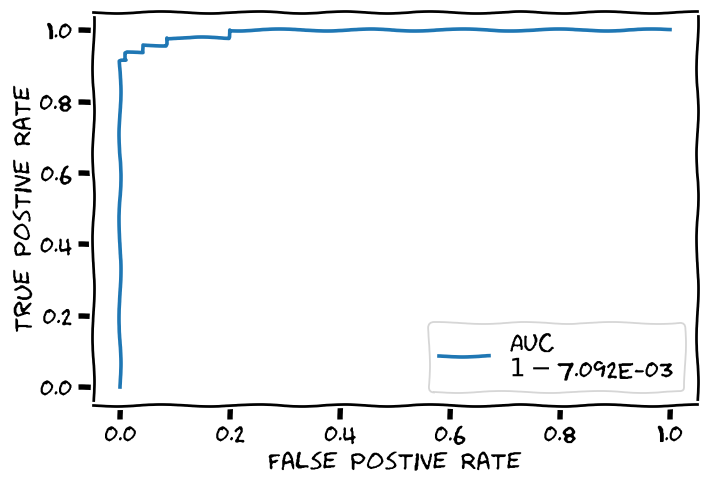

In [ ]:
with plt.xkcd():
    plt.figure(dpi=130)
    plt.plot(fpr,tpr)
    plt.legend(['AUC \n$1 - ${:.3E}'.format(1-auc)])
    plt.ylabel('True Postive Rate')
    plt.xlabel('False Postive Rate')
    plt.show()